#  Project: Investigate a Dataset - [World happiness report dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Olympics dataset 

>The United Nation’s Sustainable Development Solutions Network published the world happiness report on 19th March 2021 that ranks the world's 149 countries on how happy their citizens perceive themselves to be based on various indicators. The happiness study ranks the countries on the basis of questions from the Gallup World Poll. The results are then equated with other factors such as GDP, life expectancy, generosity, etc. In the year 2021, it focused on the effects of the Covid-19 pandemic and how people all over the world have managed to survive and prosper.  


## Questions for Analysis:

>Is there a relatin between GDP and happiness score?

>What are the regions with highest happiness score?

>What is the number of countries in each region?

>What is the most corrupted region?

>What is the life expectency of the top 10 happiest countries?

>What is the life expectency of the top 10 lowest happy countries?

>Is there a correlation between freedom to make life choices and happiness score?

>What is the happiness score of the top 10 corrupted countries?

>Is there a correlation between corruption and happiness?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.shape

(149, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I removed columns that are not necessary for my analysis: 'standard_error_of_ladder_score','upperwhisker','lowerwhisker', 'explained_by:_log_gdp_per_capita', 'explained_by:_social_support', 'explained_by:_healthy_life_expectancy', 'explained_by:_freedom_to_make_life_choices', 'explained_by:_generosity', 'explained_by:_perceptions_of_corruption','dystopia_+_residual' to improve database redability.

>I checked for null values.

>I checked for duplicates.

In [6]:
#Improving the columns names for easier manipulation..
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace = True)

In [7]:
#dropping unnecessary columns..
df.drop(['standard_error_of_ladder_score','upperwhisker','lowerwhisker', 'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
         'explained_by:_healthy_life_expectancy', 'explained_by:_freedom_to_make_life_choices', 'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
         'dystopia_+_residual'], axis = 1, inplace=True)

In [8]:
#Checking..
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


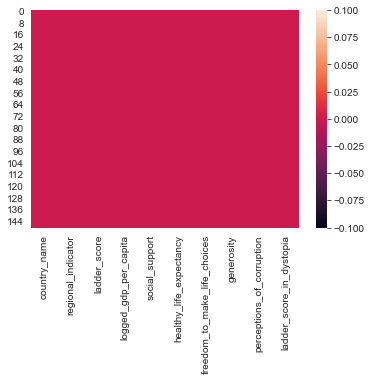

In [9]:
#Checking for Null values using the Heat map...
sns.heatmap(df.isnull());

In [10]:
#Checking for duplicates
df.duplicated().sum()

0

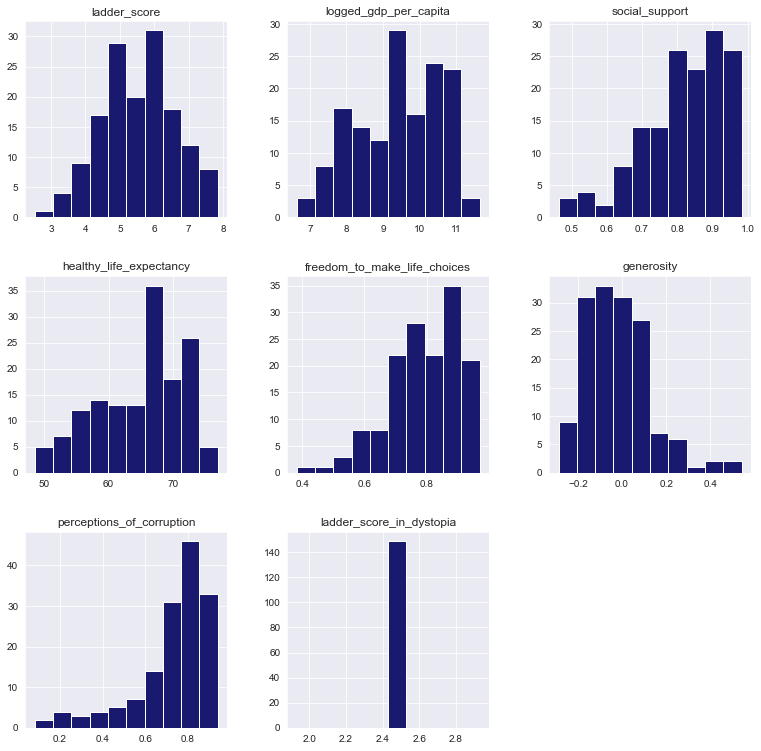

In [11]:
#An Overview of the dataset..
df.hist(figsize=(13,13),
        color = 'midnightblue');

# Happiness and GDP

In [12]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


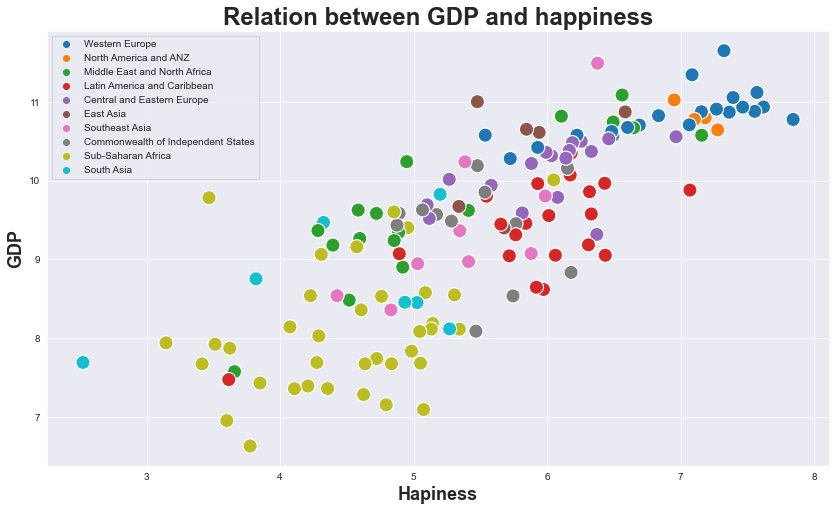

In [13]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'ladder_score',
                y ='logged_gdp_per_capita',
                data = df,
                hue = 'regional_indicator',
                s = 200)
plt.title('Relation between GDP and happiness', fontsize = 24, weight = 'bold')
plt.xlabel('Hapiness', fontsize = 18, weight = 'bold')
plt.ylabel('GDP', fontsize = 18, weight = 'bold')
plt.legend()
plt.show();

>There is a positive correlation between both GDP and Happiness scores, Western Europe are leading the chart both in GDP and Happiness.

>Sub-Saharan Africa are quite interesting, they have a similar Happiness score compared to regions have a higher GDP.

# What are the regions with the highest mean happiness score?

In [14]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


In [15]:
region_happiness = df.groupby('regional_indicator')['ladder_score'].mean().sort_values(ascending = False)

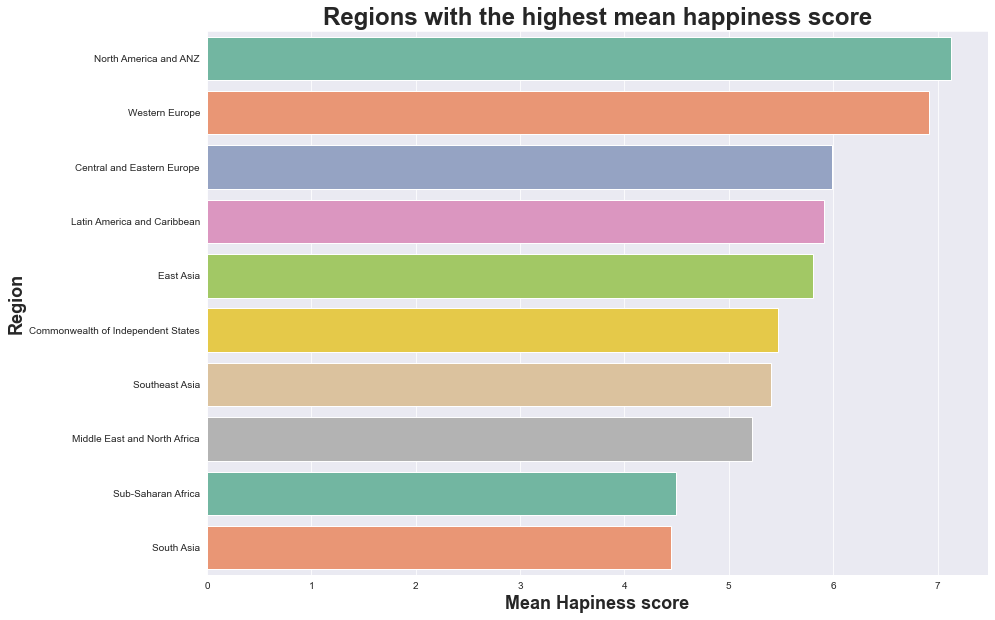

In [16]:
plt.figure(figsize=(14,10))
sns.barplot(x = region_happiness,
            y = region_happiness.index,
            palette='Set2')
plt.title('Regions with the highest mean happiness score', fontsize = 24, weight = 'bold')
plt.xlabel('Mean Hapiness score', fontsize = 18, weight = 'bold')
plt.ylabel('Region', fontsize = 18, weight = 'bold')
plt.show();

>Both, North America and ANZ and Western Europe have the highest mean happiness score, while South Asia is the lowest. 

# Total number of countries in each region

In [17]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


In [18]:
countries_region = df.groupby('regional_indicator')['country_name'].count().sort_values(ascending = False)
countries_region

regional_indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: country_name, dtype: int64

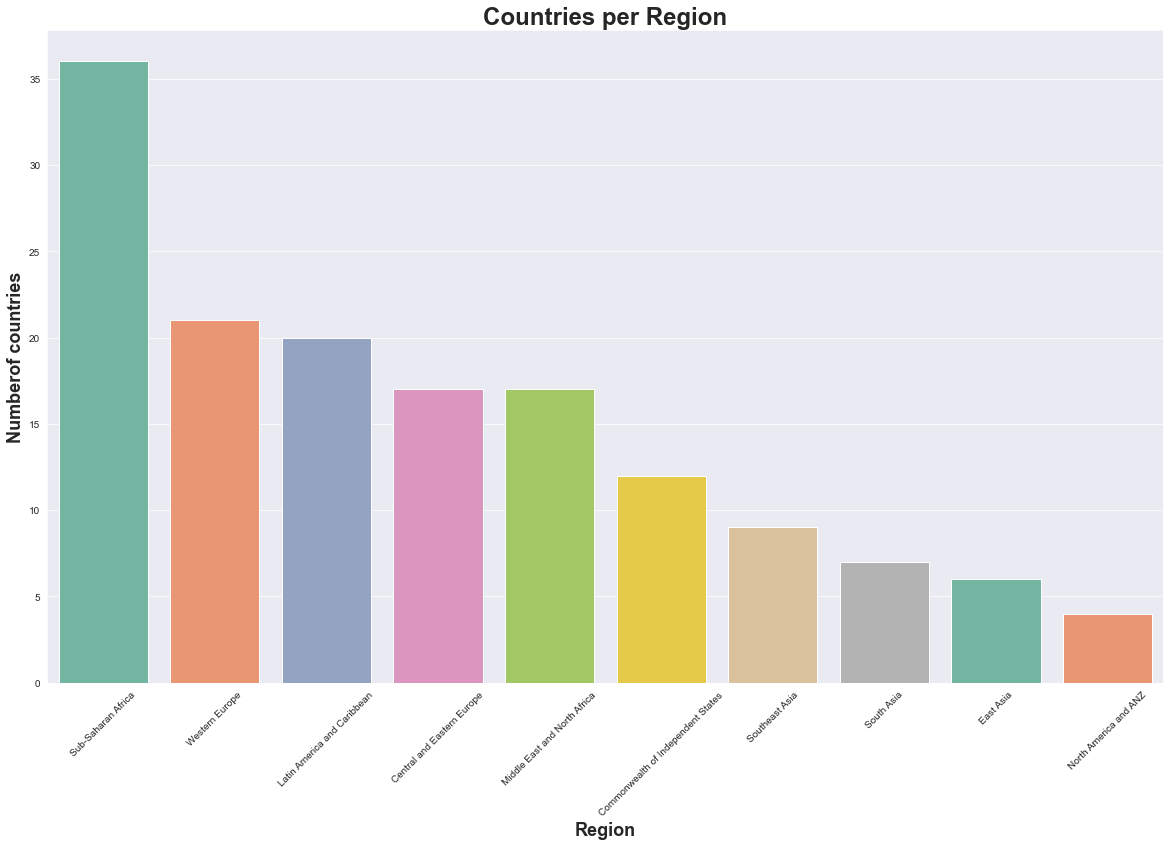

In [19]:
plt.figure(figsize=(20,12))
sns.barplot(x = countries_region.index,
            y = countries_region,
            palette= 'Set2')
plt.title('Countries per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Region', fontsize = 18, weight = 'bold')
plt.ylabel('Numberof countries', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>Sub-Saharan Africa is the region with highest participants (36), while North America and ANZ with only (4).

# Correlation Map

<ipython-input-20-4e6377443e1a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cor, dtype=np.bool),


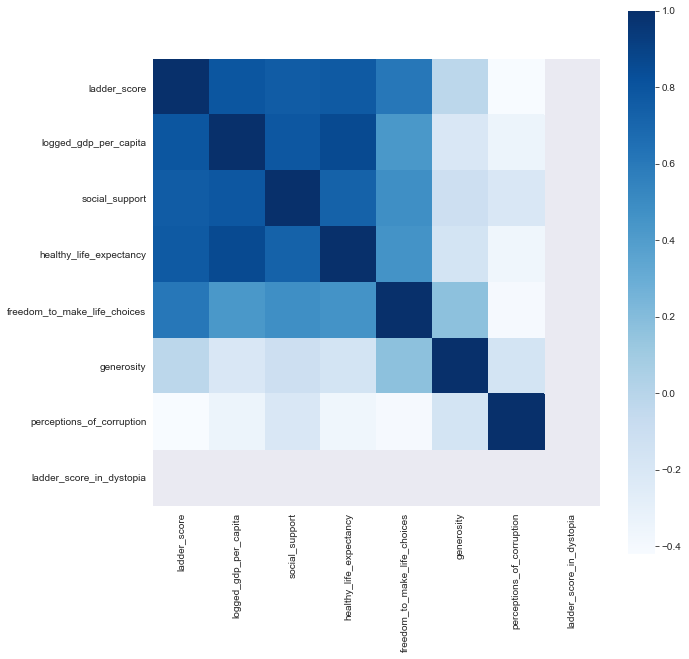

In [20]:
plt.figure(figsize=(10,10))
cor = df.corr(method = 'pearson')
sns.heatmap(cor,
            mask = np.zeros_like(cor, dtype=np.bool),
            cmap = 'Blues',
            square = True);
          
            

>A Correlation Heat Map of all the parameters.

>The more dark the color blue, the higher the correlation, for example ladder_score has a high correlation with GDP, healthy life expectancy, then social support, then freedom to make life choices, and a lower correlation with generosity, and a negative correlation with perceptions of corruption.

# Corruption in region 

In [21]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


In [22]:
region_corrupt = df.groupby('regional_indicator')['perceptions_of_corruption'].mean().sort_values(ascending = False)

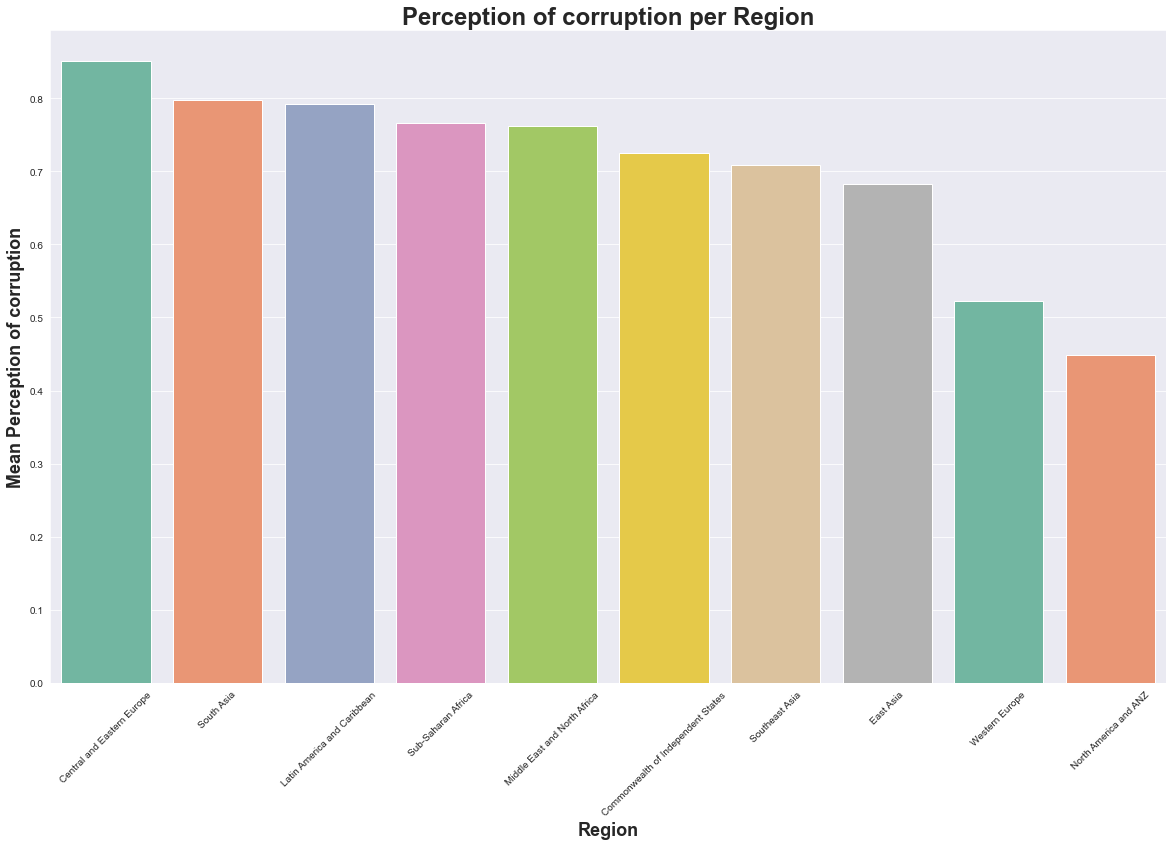

In [23]:
plt.figure(figsize=(20,12))
sns.barplot(x = region_corrupt.index,
            y = region_corrupt,
            palette= 'Set2')
plt.title('Perception of corruption per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Region', fontsize = 18, weight = 'bold')
plt.ylabel('Mean Perception of corruption', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>Central and Eastern Europe is the highest corrupted region, while North America and ANZ is the lowest.

# What is the life expectancy of the happiest 10 countries?

In [24]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


In [25]:
top_10_countries = df.groupby('country_name')[['ladder_score', 'healthy_life_expectancy']].sum().sort_values(by = 'ladder_score' ,ascending = False).head(10)

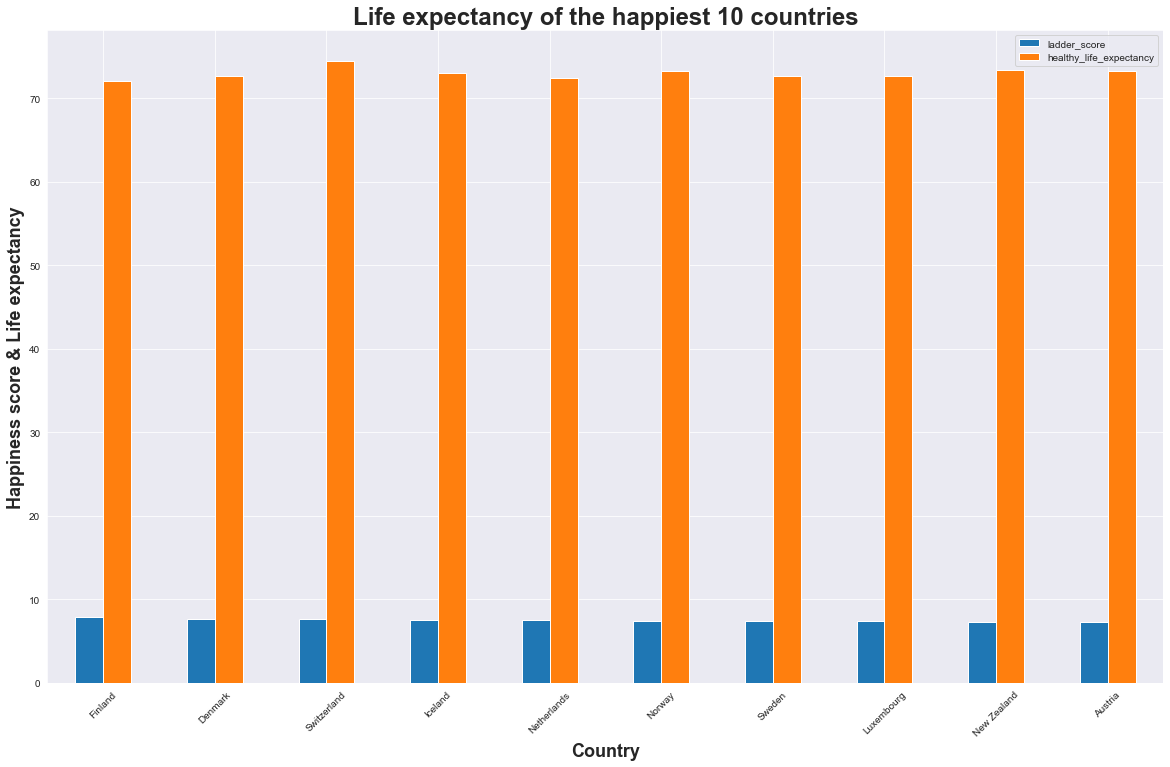

In [26]:
top_10_countries.plot(kind = 'bar',
                      figsize=(20,12))
plt.title('Life expectancy of the happiest 10 countries', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Happiness score & Life expectancy', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.legend()
plt.show();

>The top 10 happiest countries have a life expectency which is higher than 70 years.

# What is the life expectancy of the happiest 10 countries?

In [27]:
lowest_10_countries = df.groupby('country_name')[['ladder_score', 'healthy_life_expectancy']].sum().sort_values(by = 'ladder_score').head(10)
lowest_10_countries 

,ladder_score,healthy_life_expectancy
country_name,,
Afghanistan,2.523,52.493
Zimbabwe,3.145,56.201
Rwanda,3.415,61.400
Botswana,3.467,59.269
Lesotho,3.512,48.700
Malawi,3.600,57.948
Haiti,3.615,55.700
Tanzania,3.623,57.999
Yemen,3.658,57.122


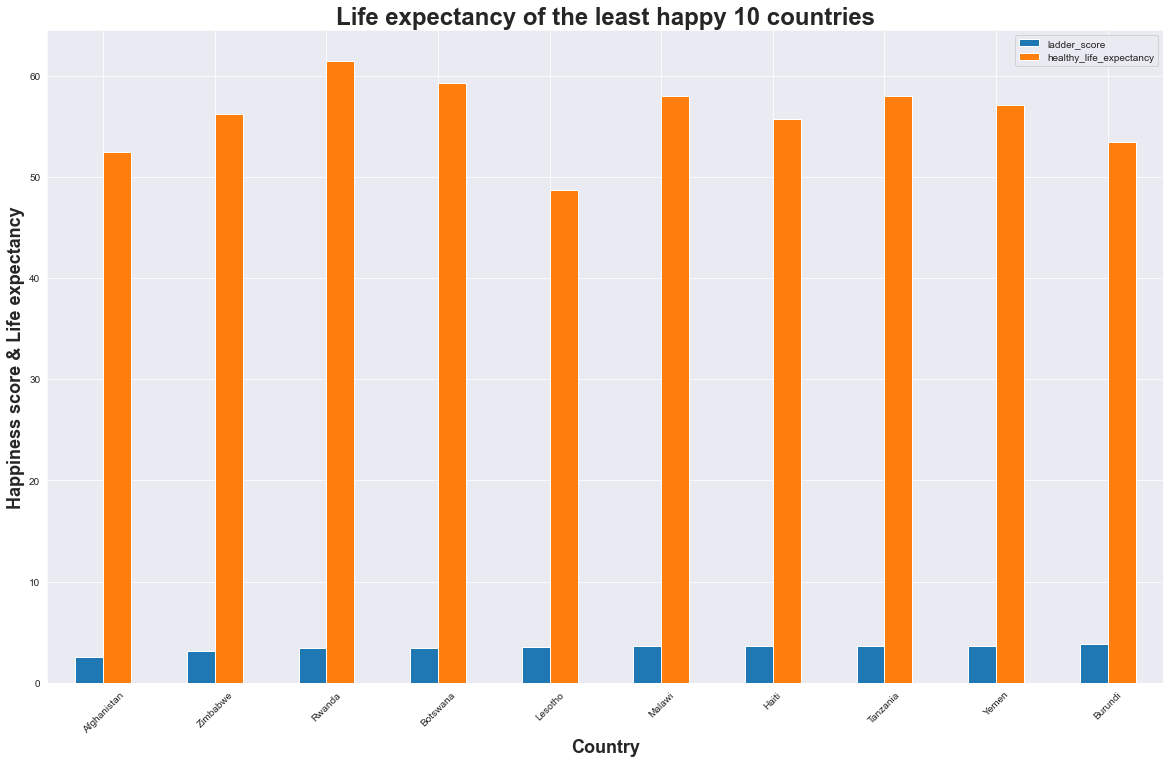

In [28]:
lowest_10_countries.plot(kind = 'bar',
                      figsize=(20,12))
plt.title('Life expectancy of the least happy 10 countries', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Happiness score & Life expectancy', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.legend()
plt.show();

>The least happy countries have a life expectency lower than 60 years.

>Countries like Afghanistan and Lesotho have a life expectency around 50 years which is more than 20 years difference from the 10 happiest countries.

# Life Choices and happiness score

In [29]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


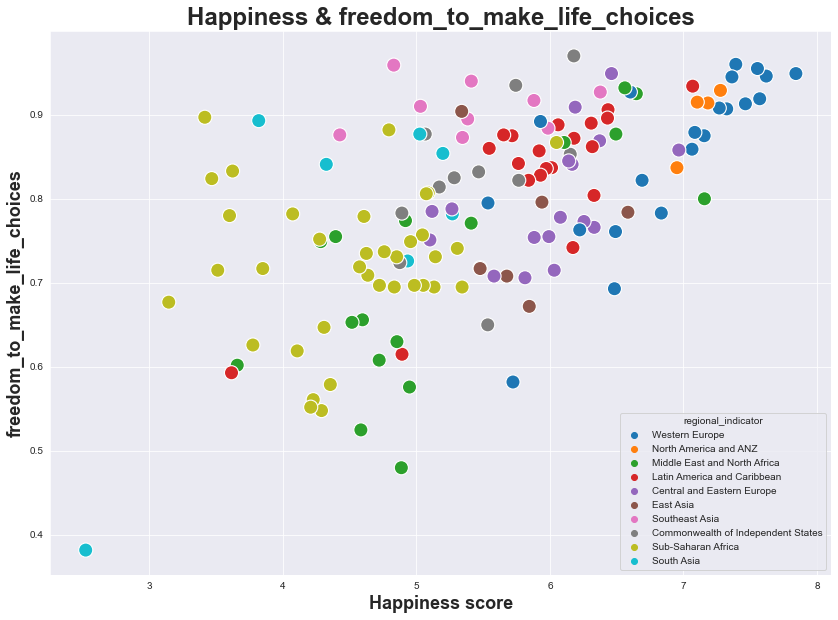

In [30]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'ladder_score',
                y = 'freedom_to_make_life_choices',
                data = df,
                s = 200,
                hue = 'regional_indicator')
plt.title('Happiness & freedom_to_make_life_choices', fontsize = 24, weight = 'bold')
plt.xlabel('Happiness score', fontsize = 18, weight = 'bold')
plt.ylabel('freedom_to_make_life_choices', fontsize = 18, weight = 'bold')
plt.show();

>There is a positive correlation between Happiness and freedom of life choices.

>Western Europe lead the chart of both happiness and freedom of life choices.

>Sub-Saharan Africa seem to have a high freedom of life choices but unfortunately doesn't reflect much on their happiness scores.

# Top 10 Corrupt Countries and their happiness score

In [31]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


In [32]:
corruption_df = df.groupby('country_name')[['perceptions_of_corruption', 'ladder_score']].sum().sort_values(by = 'perceptions_of_corruption', 
                                                                                          ascending = False).head(10)
corruption_df

,perceptions_of_corruption,ladder_score
country_name,,
Croatia,0.939,5.882
Romania,0.938,6.140
Bulgaria,0.932,5.266
Bosnia and Herzegovina,0.931,5.813
Afghanistan,0.924,2.523
Ukraine,0.924,4.875
Moldova,0.918,5.766
Kosovo,0.917,6.372
Lesotho,0.915,3.512


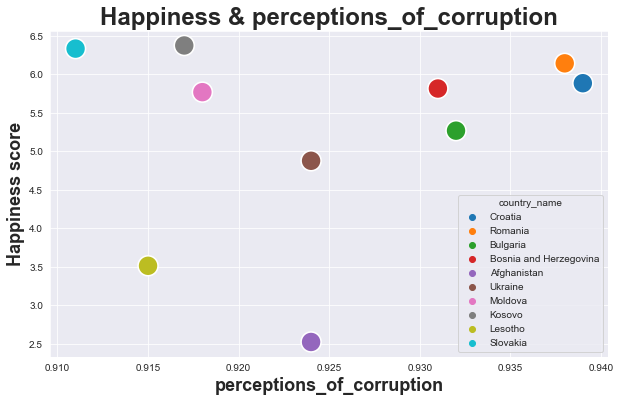

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'perceptions_of_corruption',
                y = 'ladder_score',
                data = corruption_df,
                hue = 'country_name',
                s =400)
plt.title('Happiness & perceptions_of_corruption', fontsize = 24, weight = 'bold')
plt.xlabel('perceptions_of_corruption', fontsize = 18, weight = 'bold')
plt.ylabel(' Happiness score ', fontsize = 18, weight = 'bold')
plt.show();

>Shockingly Croatia and Romania are the highest two countries of perceptions of corruption.

>Afghanistan and Lesotho, both of them are included in the most corrupted countries, but it seems from their happiness score that they are facing a lot of different obstacles beside the corruption.

# Corruption and Happiness

In [34]:
df.head(1)

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43


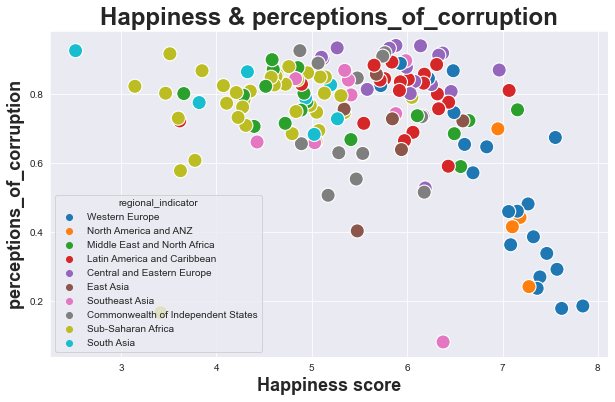

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'ladder_score',
                y = 'perceptions_of_corruption',
                data = df,
                hue = 'regional_indicator',
                s =200)
plt.title('Happiness & perceptions_of_corruption', fontsize = 24, weight = 'bold')
plt.xlabel('Happiness score', fontsize = 18, weight = 'bold')
plt.ylabel(' perceptions_of_corruption ', fontsize = 18, weight = 'bold')
plt.show();

>There is a negative correlation between happiness and corruption.

>The correlation is not very strong, as you can see most of the countries have a 0.8 perception of corruption but yet their happiness score varies from 3 till 7.

<a id='conclusions'></a>
# Conclusions:

>There is a positive correlation between both GDP and Happiness scores, Western Europe are leading the chart both in GDP and Happiness.

>Sub-Saharan Africa are quite interesting, they have a similar Happiness score compared to regions have a higher GDP.

>Both, North America and ANZ and Western Europe have the highest mean happiness score, while South Asia is the lowest.

>Sub-Saharan Africa is the region with highest participants (36), while North America and ANZ with only (4).

>Central and Eastern Europe is the highest corrupted region, while North America and ANZ is the lowest.

>The top 10 happiest countries have a life expectency which is higher than 70 years.

>The least happy countries have a life expectency lower than 60 years.

>Countries like Afghanistan and Lesotho have a life expectency around 50 years which is more than 20 years difference from the 10 happiest countries.

>There is a positive correlation between Happiness and freedom of life choices.

>Western Europe lead the chart of both happiness and freedom of life choices.

>Sub-Saharan Africa seem to have a high freedom of life choices but unfortunately doesn't reflect much on their happiness scores.

>Shockingly Croatia and Romania are the highest two countries of perceptions of corruption.

>Afghanistan and Lesotho, both of them are included in the most corrupted countries, but it seems from their happiness score that they are facing a lot of different obstacles beside the corruption.

>There is a negative correlation between happiness and corruption, the correlation is not very strong, as you can see most of the countries have a 0.8 perception of corruption but yet their happiness score varies from 3 till 7.